In [2]:
import torch
from dataset_class import dataset,params2theta,theta2params
import dataset_class as dc
import pandas as pd
from matplotlib import pyplot as plt

import numpy as np
np.random.seed(42)

In [3]:
def load_dataset(filename,Nmax=10**1000,remove_zeros=True):
    df=pd.read_csv(filename)[:Nmax]
    cts,dils = df['Counts'].to_numpy(),df['Dilution'].to_numpy().astype(float)
    if remove_zeros:
        cts,dils = cts[cts!=0],dils[cts!=0]
    return dataset(cts,dils)

In [4]:
probs = lambda data,theta: torch.exp(dc.Igaussmix_loglike(data.n[1:],*theta2params(theta,theta.size(0)//3)))
probs_sep = lambda data,m,s,r: torch.exp(dc.Igaussmix_loglike(data.n[1:],m,s,r))

In [5]:
data_SA = load_dataset('carol_data_early/Day3.csv',remove_zeros=False)
data_SA.evaluate(lr=.01,dir_factor=.9)

/home/pessoa/anaconda3/lib/python3.9/site-packages/sklearn/mixture/_base.py:116: ConvergenceWarning: Number of distinct clusters (21) found smaller than n_clusters (25). Possibly due to duplicate points in X.
  cluster.KMeans(
/home/pessoa/anaconda3/lib/python3.9/site-packages/torch/autograd/__init__.py:200: UserWarning: Error detected in PowBackward0. Traceback of forward call that caused the error:
  File "/home/pessoa/anaconda3/lib/python3.9/runpy.py", line 197, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/home/pessoa/anaconda3/lib/python3.9/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/home/pessoa/anaconda3/lib/python3.9/site-packages/ipykernel/kernelapp.py"

RuntimeError: Function 'PowBackward0' returned nan values in its 0th output.

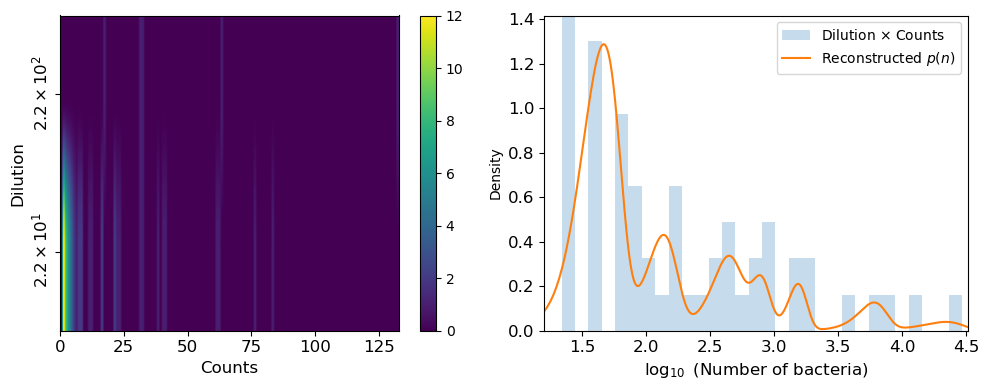

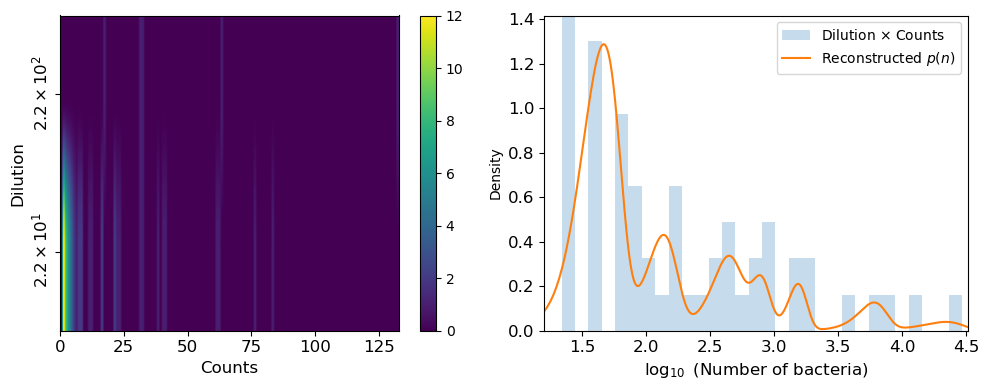

In [ ]:
data_SA.make_plot(filename='graphs/carol/Day3.png')

In [12]:
g = pd.read_csv('carol_data_early/Day3.csv')
k = g['Counts'].to_numpy()
dil = g['Dilution'].to_numpy()

In [13]:
k*dil

array([   44,    66,   242,    44, 22644,  3146,    44,  3608,    66,
         704,  1144,    22,     0,     0,     0,  9648,     0, 10400,
          22,    88,   110,    22, 11322,  3996,   126,   968,    88,
        1012, 15984,  7992,    44,  1144, 22644,  1144,    22])

/tmp/ipykernel_403753/1508286653.py:1: RuntimeWarning: divide by zero encountered in log10
  plt.hist(np.log10(k*dil),bins=35)


ValueError: supplied range of [-inf, 4.354953146212556] is not finite

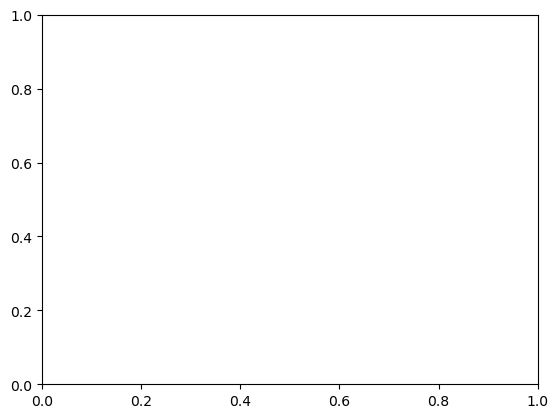

In [17]:
plt.hist(np.log10(k*dil),bins=35)